In [12]:
import ijson
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [6]:
with open("../witness-size.json") as f:
    witness_sizes = json.load(f)
    
with open("../block-size.json") as f:
    block_sizes = json.load(f)
    
with open("../db-bytes.json") as f:
    db_bytes = json.load(f)
    
with open("../db-ops.json") as f:
    db_ops = json.load(f)



In [65]:
def plot_sizes(data, ax, title, ylabel, *, rolling=1):
    i = max(range(len(data)), key=lambda i: data[i][1])
    print("max size:", data[i])
    ax.margins(0.01)
    ax.scatter([x[0] for x in data], np.convolve([x[1] for x in data], np.ones((rolling,))/rolling, mode='same'), s=1)
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: "#" + str(int(x))))
    ax.tick_params(labelsize=14)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel("Block Number", fontsize=18)
    return ax

max size: [2806693, 718140]


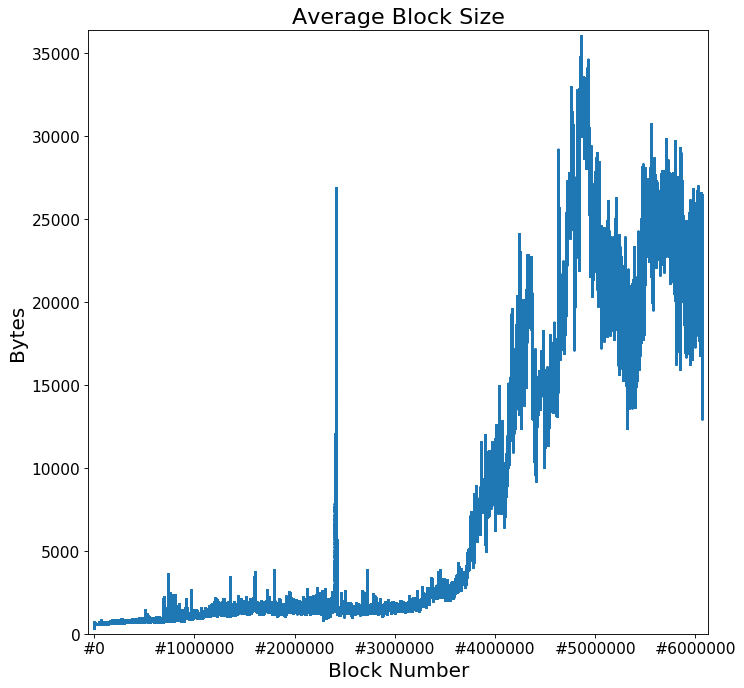

In [66]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
plot_sizes(block_sizes, ax, "Average Block Size", "Bytes", rolling=2000)
ax.get_yaxis().set_major_locator(ticker.MultipleLocator(5000))

max size: (2306350, 48052.6533203125)


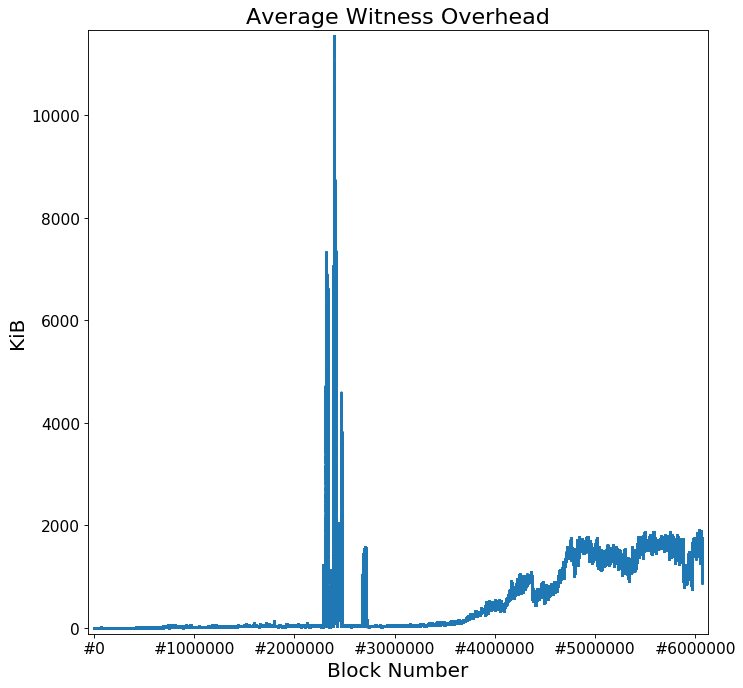

In [67]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
plot_sizes([(x[0], x[1] / 1024) for x in witness_sizes], ax, "Average Witness Overhead", "KiB", rolling=2000)
ax.get_yaxis().set_major_locator(ticker.MultipleLocator(2000))

In [68]:
def plot_db_stats(data, ax, title, ylabel, *, rolling=1):
    ax.margins(0.01)
    read_scatter = ax.scatter([x[0] for x in data], 
                              np.convolve([x[1] for x in data], np.ones((rolling,))/rolling, mode='same'),
                              s=1, alpha=0.5)
    write_scatter = ax.scatter([x[0] for x in data], 
                               np.convolve([x[2] for x in data], np.ones((rolling,))/rolling, mode='same'),
                               s=1)
    delete_scatter = ax.scatter([x[0] for x in data], 
                                np.convolve([x[3] for x in data], np.ones((rolling,))/rolling, mode='same'),
                                s=1)
    ax.legend((read_scatter, write_scatter, delete_scatter), ("Read", "Write", "Delete"), fontsize=12, markerscale=5)
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: "#" + str(int(x))))
    ax.tick_params(labelsize=12)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel("Block Number", fontsize=16)
    return ax

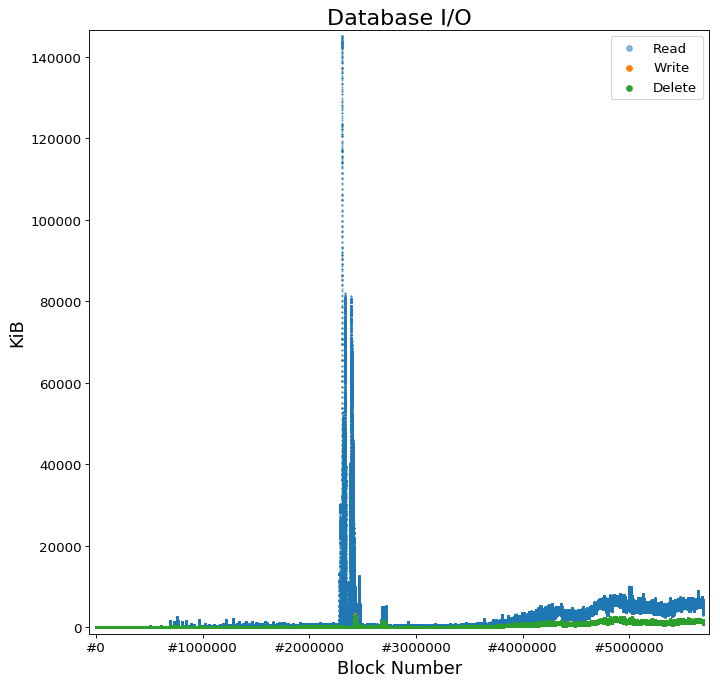

In [69]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(1, 1, 1)
plot_db_stats([[x[0], x[1] / 1024, x[2] / 1024, x[3] / 1024] for x in db_bytes], ax, "Database I/O", "KiB", rolling=200)

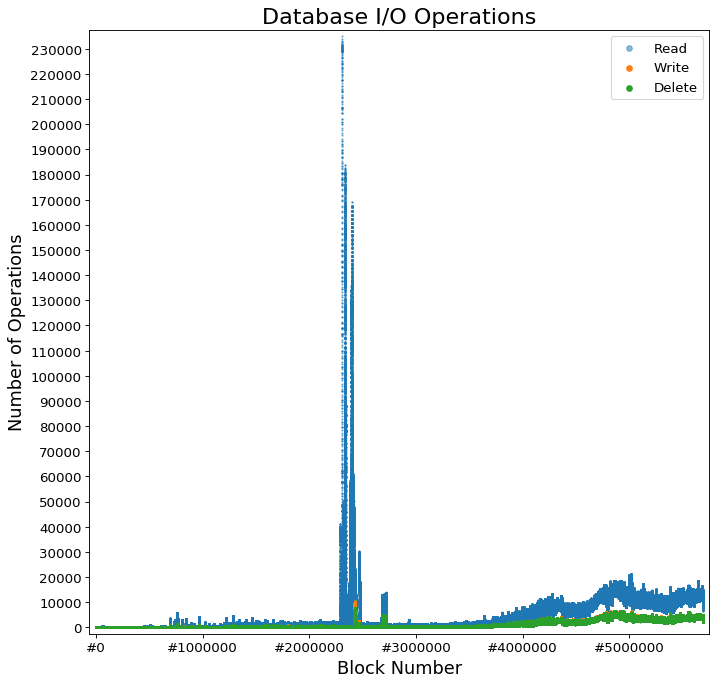

In [70]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(1, 1, 1)
plot_db_stats(db_ops, ax, "Database I/O Operations", "Number of Operations", rolling=200)
ax.get_yaxis().set_major_locator(ticker.MultipleLocator(10000))